<a href="https://colab.research.google.com/github/hyonnys/tp1/blob/main/AIB_TP1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. 모델 상용화 가치**<br>
- 수출량 상위 수산식품
- 장식품 생산 (진주, 자개)
- 친환경 재활용 기술 개발<br>
🔎 수명 예측으로 번식 증가 가능성<br>
🔎 수명 예측으로 양식장 환경 유지 비용 감소 가능성<br>
🔎 수명 예측으로 장식품 품질 향상 가능성<br>
🔎 수명 예측으로 전복 먹이 사슬에 대한 해양생태계 안정화<br>
❗수명 예측 결과와의 연관성에 대한 추가 조사 필요
<br>

### **2. 모델 성능 고도화**<br>
- 코드 리펙터링
  - 활용할 라이브러리 결정
  - 코드 간결화: 리스트컴프리헨션 및 파이썬 메서드 활용
- Data Engineering
  + 충분한 양의 데이터 확보 - 전이 학습법 활용?
  + 타겟 데이터 불균형 확인 - 분포 확인
  + 정보 누수 확인 - 상관관계 확인 결과, 누수 없음
- Model Engineering
  + Baseline
    + 에폭, 미니배치, 은닉계층 깊이와 노드 수
    + 편향 경사하강법 사용
  - 고도화된 모델
    + 성능 **평가지표 기준** 세우기
    + **미니배치 경사하강법** (iteration마다 N개의 배치 사이즈 데이터를 사용한다)
    + 다변수의 기울기 계산할 때에, 경사하강법의 비용이 커지므로 비효율적이다. 따라서 **오차역전파법**을 사용한다.
    - 오차역전파법(backpropagation)은 경사하강법의 미분계산 대신 수열의 점화식을 사용한다.
<br>

### **3. 모델 배포**<br>
- Web APP 구현
  + 데이터 입력 페이지
  + 수명 예측 결과 출력 페이지
<br>
- - -

# **Feature Details** <br>
+ **Sex** - Female(암컷), Male(수컷), Infant(어린 전복)
+ **Length** - 껍데기의 최대 길이 (mm)
+ **Diameter** - 두께? (mm) perpendicular to length
+ **Height** - 총 길이 (mm)
+ **Whole_weight** - 총 무게 (g)
+ **Shucked_weight** - 전복살 무게 (g)
+ **Viscera_weight** - 내장 무게 (g)
+ **Shell_weigth** - 껍질 무게 (g)
+ _**Rings** - 수명 (TARGET)_
<br>
- - -

# **Part 1. 탐색**<br>
### **1-1. 품질** <br>
_Task_ <br>
- 중복/결측/부정확 데이터 확인 필요<br>

_Result_
- 중복 및 결측 데이터 없음.
- 부정확 데이터 세부 확인 필요.
<br>
<br>

### **1-2. 구조** <br>
_Task_
> 1) 각 변수(variable)는 하나의 열(column)을 구성  
2) 각 관측치(observation)는 하나의 행(row)을 구성  
3) 각 유형의 관측 단위가 표를 구성

_Result_ <br>
- 위의 경우에 해당되지 않음.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
abalone = pd.read_csv('/content/drive/MyDrive/regression_data.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone.duplicated().sum()

0

### **1-3. Target Data**<br>
- 타겟 데이터의 범위는 1 ~ 29까지임.
- 다수의 데이터가 중간값과 가까운 값을 가지는 것을 확인할 수 있음.

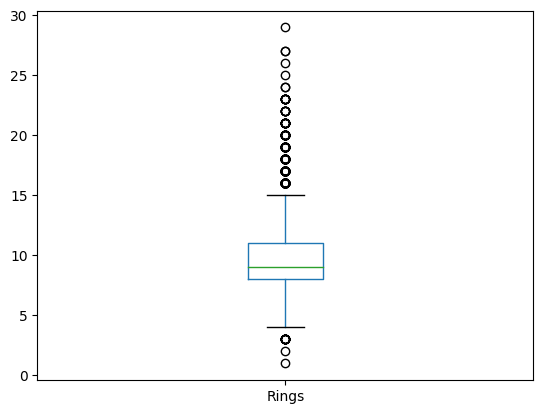

In [ ]:
abalone[['Rings']].boxplot(grid=False);

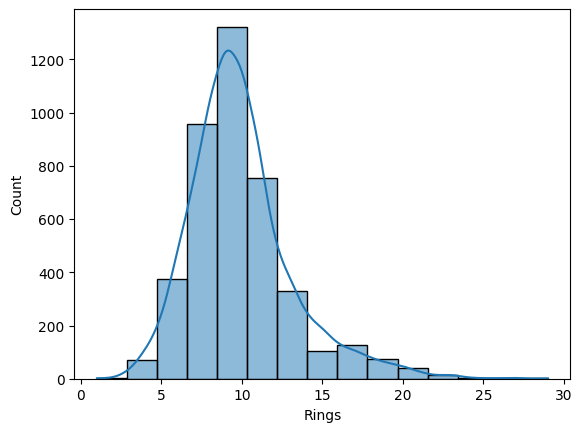

In [ ]:
sns.histplot(abalone['Rings'], bins=15, kde=True);

In [ ]:
abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [ ]:
abalone['Rings'].sort_values(ascending=False)

480     29
2209    27
2108    27
294     26
2201    25
        ..
3521     3
526      3
238      3
719      2
236      1
Name: Rings, Length: 4177, dtype: int64

### **1-4. Feature Data**<br>
#### Univariate Analysis<br>
> **Numerical Features**<br>
- 분포 및 박스플롯 확인 결과, 대부분의 특성이 정규 분포를 이루고 있음.
- 하지만, Height 특성에서 0.4이상의 데이터 제거할 필요 있다고 사료됨.

<br>

> **Categorical Feature**<br>
- Sex특성의 카테고리 Male, Female, Infant는 데이터 균형을 이루고 있음.

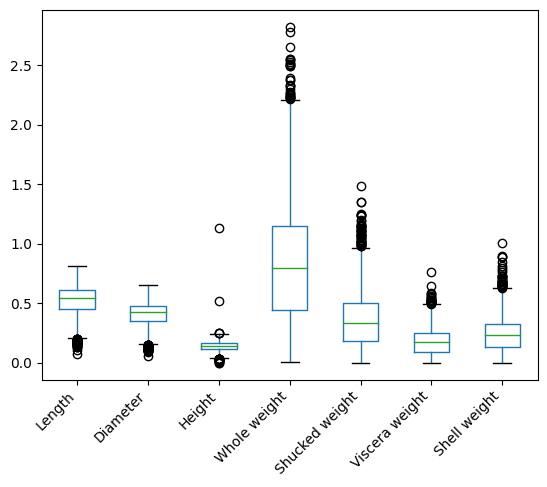

In [ ]:
abalone_x = abalone.drop(columns='Rings')
abalone_x.boxplot(grid=False)
plt.xticks(rotation=45, ha='right');

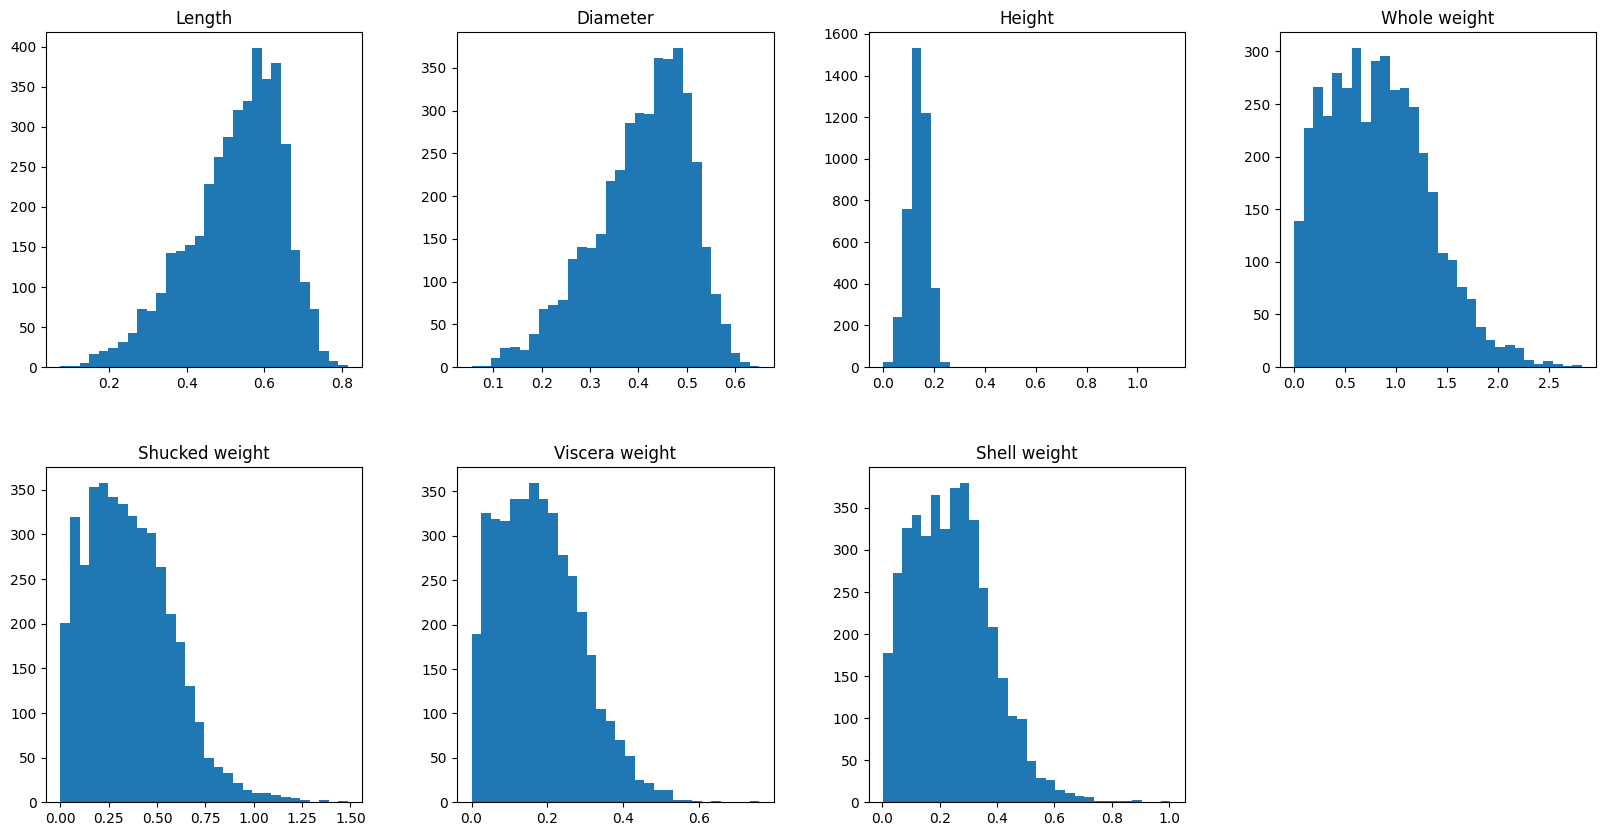

In [ ]:
abalone_x.hist(figsize=(20,10), grid=False, layout=(2, 4), bins=30);

In [ ]:
numerical_features = abalone.select_dtypes(include=[np.number]).columns
categorical_features = abalone.select_dtypes(include=[np.object]).columns

<ipython-input-13-3aec347ac787>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = abalone.select_dtypes(include=[np.object]).columns


In [ ]:
skewness = skew(abalone[numerical_features])
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),
           pd.DataFrame(list(skewness), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)
# 0보다 큰 skewness degree를 가진 경우 = left-skewed

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


<ipython-input-15-5f8c6f343c98>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abalone['Height'])


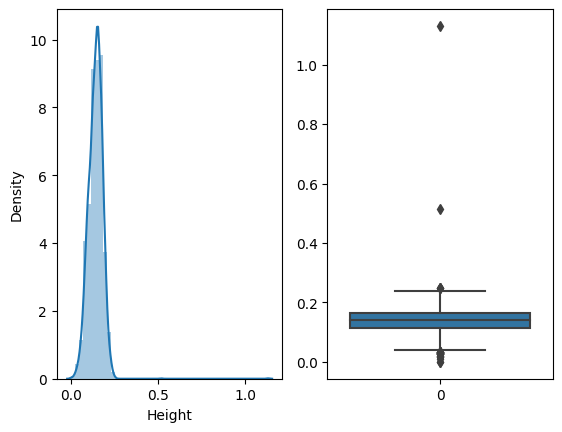

In [ ]:
# skewness degree가 가장 높은 height 특성 살펴보기
plt.subplot(1,2,1)
sns.distplot(abalone['Height'])

plt.subplot(1,2,2)
sns.boxplot(abalone['Height'])
plt.show();
# 0.4이상의 부정확 데이터 제거

In [ ]:
# Height outlier 데이터 확인
outlier_height = abalone[abalone['Height'] > 0.4]
outlier_height

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


In [ ]:
# Height outlier 데이터 제거 및 확인
abalone.drop(outlier_height.index, inplace=True)
abalone[abalone['Height']>0.4]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


<ipython-input-18-6c07312031d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abalone['Height'])


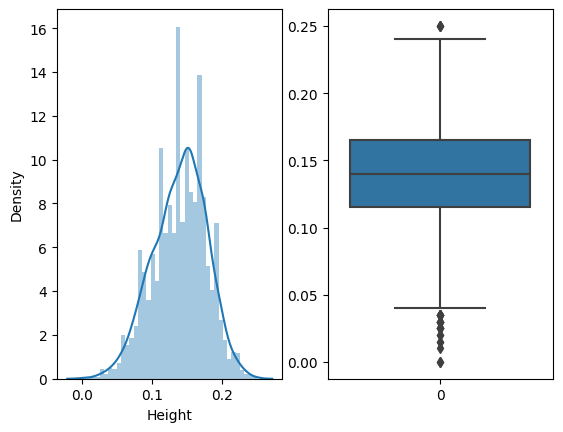

In [ ]:
# outlier 제거 후, Height 분포 및 박스플롯 재확인
plt.subplot(1,2,1)
sns.distplot(abalone['Height'])

plt.subplot(1,2,2)
sns.boxplot(abalone['Height'])
plt.show();

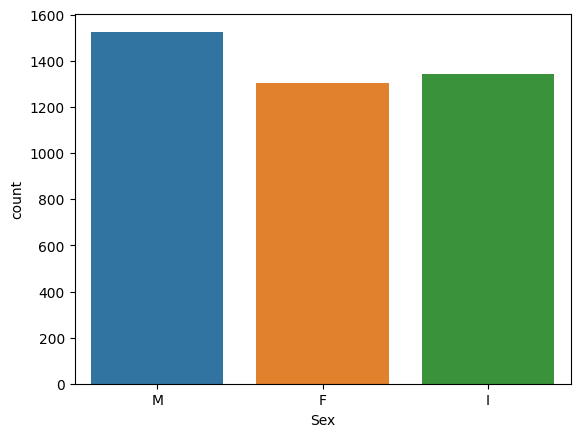

In [ ]:
sns.countplot(x='Sex', data=abalone);

### **1-5. Correlation**<br>
**1) 수치형 변수들과 타겟 데이터 간의 상관 관계**



In [ ]:
corr = abalone[numerical_features].corr(method='pearson')
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986804,0.899834,0.925372,0.898184,0.903091,0.897648,0.556827
Diameter,0.986804,1.000000,0.906086,0.925537,0.893385,0.899768,0.905271,0.574792
Height,0.899834,0.906086,1.000000,0.887712,0.836400,0.865710,0.888980,0.609634
Whole weight,0.925372,0.925537,0.887712,1.000000,0.969386,0.966311,0.955385,0.540859
Shucked weight,0.898184,0.893385,0.836400,0.969386,1.000000,0.931868,0.882681,0.421442
Viscera weight,0.903091,0.899768,0.865710,0.966311,0.931868,1.000000,0.907603,0.504234
Shell weight,0.897648,0.905271,0.888980,0.955385,0.882681,0.907603,1.000000,0.627815
Rings,0.556827,0.574792,0.609634,0.540859,0.421442,0.504234,0.627815,1.000000


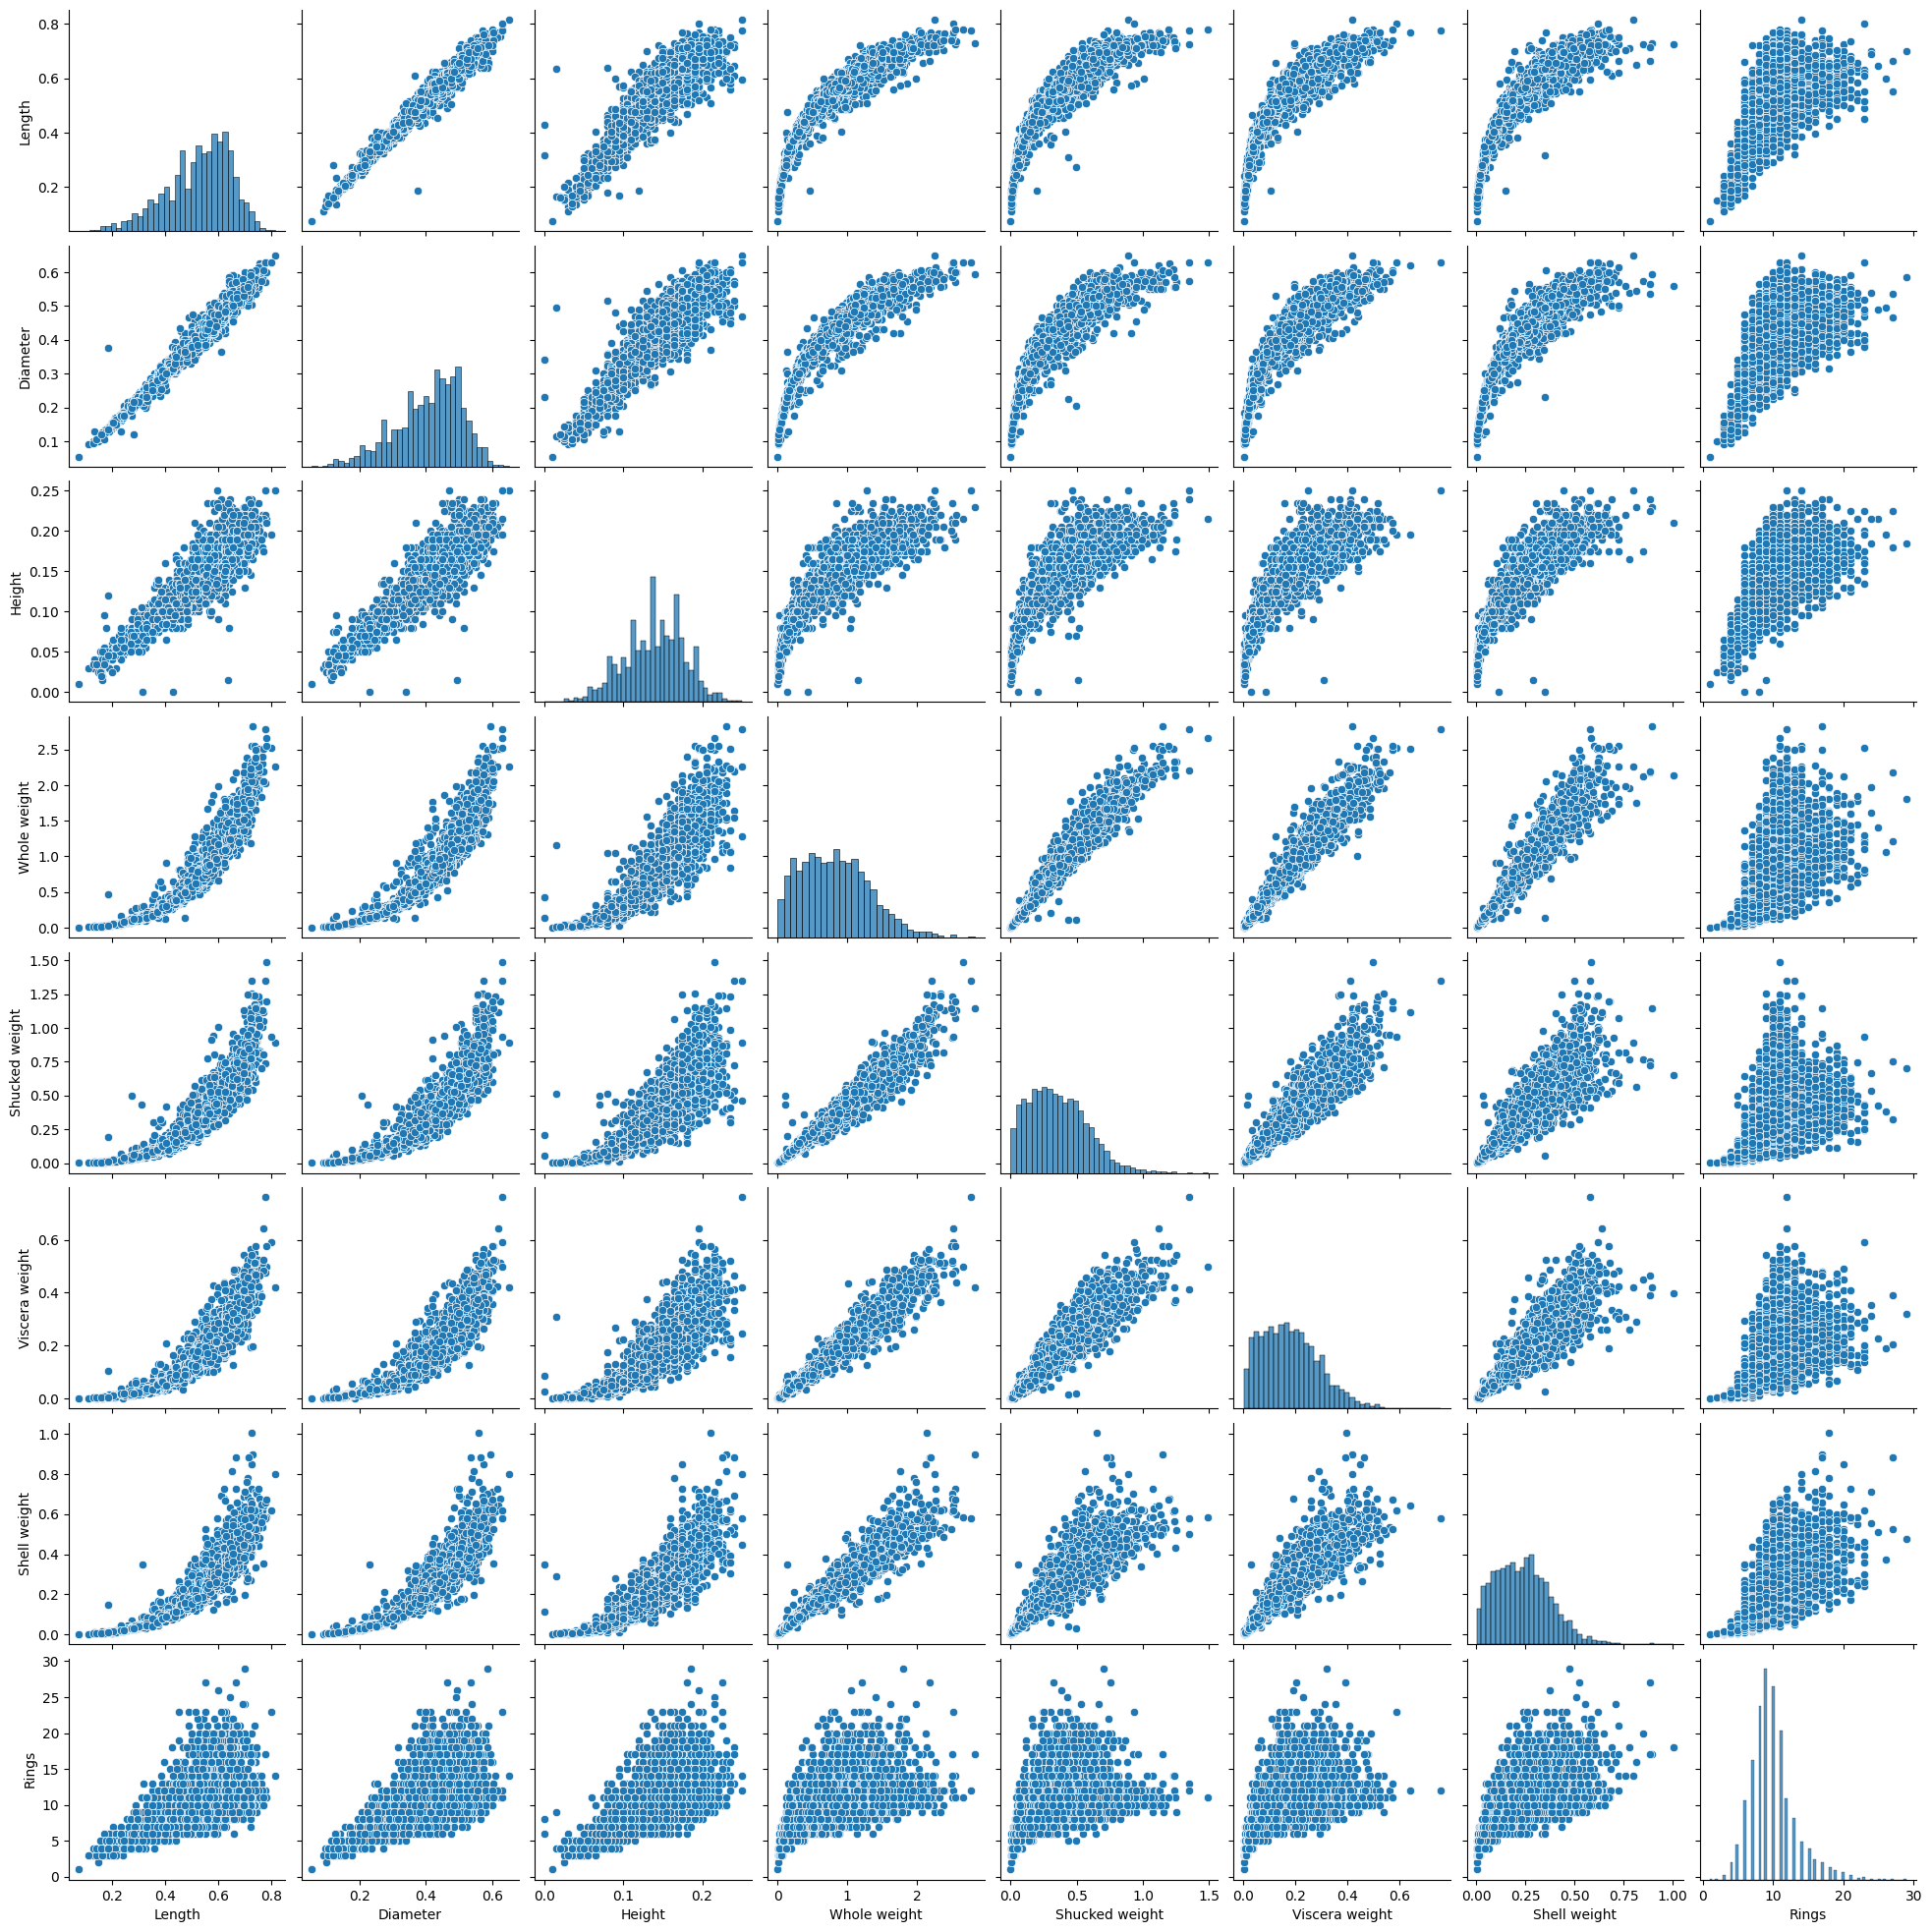

In [ ]:
sns.pairplot(abalone[numerical_features]);

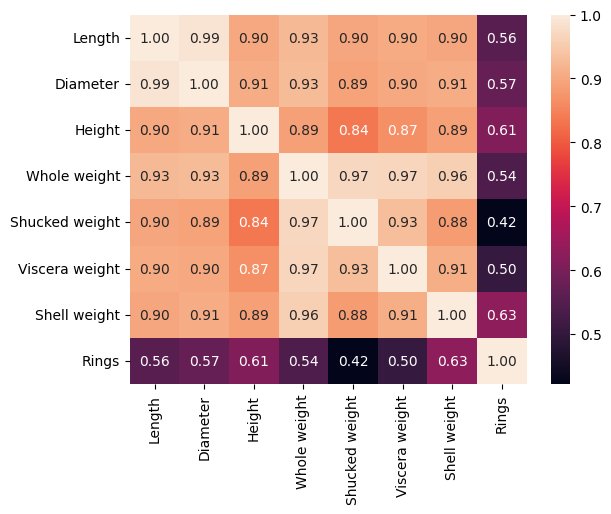

In [ ]:
# plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f");

**2) 타겟 데이터와 상관성이 큰 Height/Shell weight의 관계** <br>
- 타겟과 가장 높은 상관 관계를 보이는 독립 변수는 *Height와 Shell weight*이다.
- 각각 타겟 데이터와의 산점도를 확인해본 결과, 타겟 값이 낮아질수록 산점도가 집중되어 있고 높아질수록 산점도가 퍼져있다는 것을 알 수 있다.
- 즉, 전복의 수명이 어느 정도 높아지면 shell weight나 height의 수치와의 연관성이 낮아지는 것을 알 수 있다.
<br>

<Figure size 1000x500 with 0 Axes>

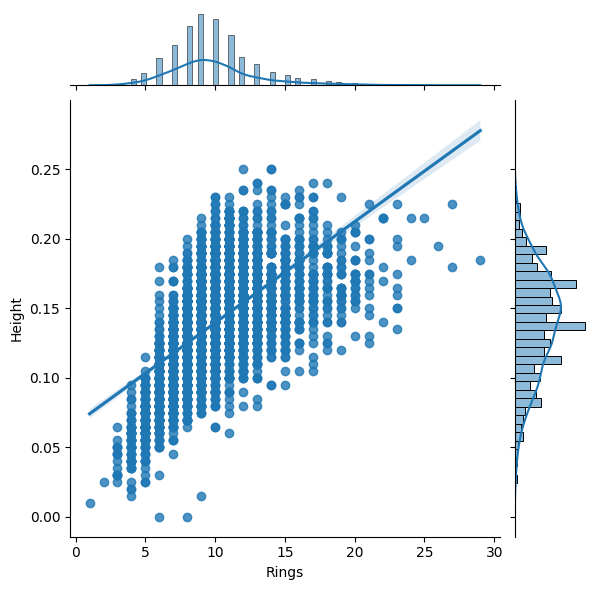

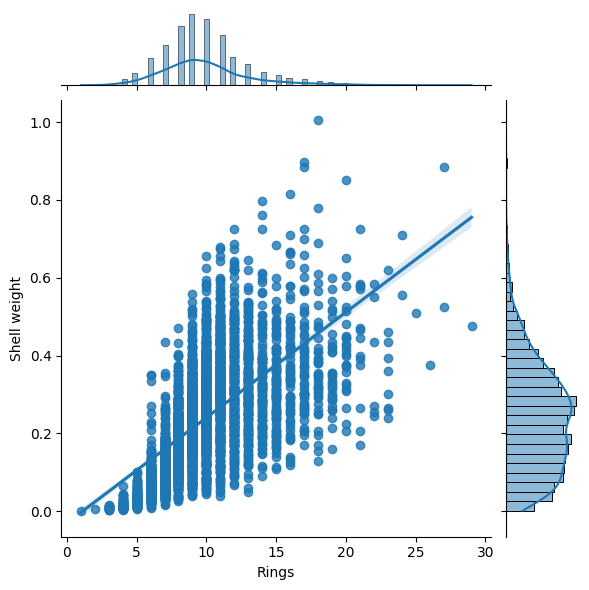

In [ ]:
plt.figure(figsize=(10, 5))

_ = sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=abalone, x='Rings', y='Shell weight', kind='reg')

**3) 타겟 범위 변경 후의 상관 관계**<br>
-  10 미만의 타겟 값을 가진 데이터와 독립 변수들 간의 상관 관계가 더 높은 것을 알 수 있음.
- 10 이상의 타겟 값 데이터와 독립 변수들 간의 상관 관계는 거의 0에 가까운 것을 확인할 수 있음.
<br>

📌 이에 따라서, 전복은 특정 수명에 달하면 크기나 무게의 변화가 일어나지 않는 것을 알 수 있음.

<ipython-input-25-a3223ed53cb0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr9 = abalone9.corr()


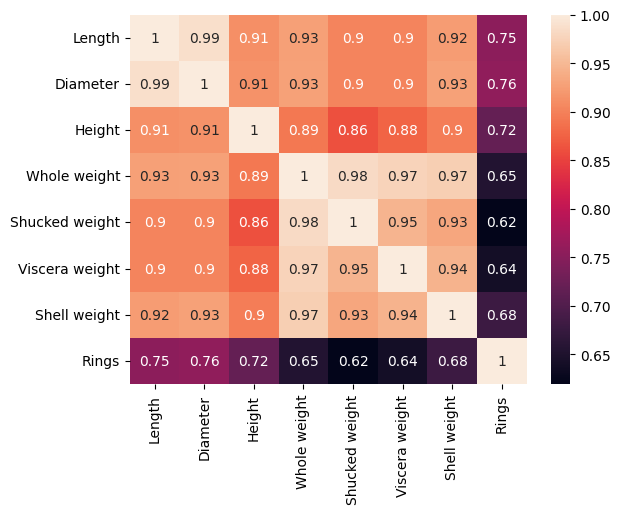

In [ ]:
# 10 미만의 타겟 값과의 상관 관계
abalone9 = abalone[abalone['Rings']<10]
corr9 = abalone9.corr()
sns.heatmap(corr9, annot=True);

<ipython-input-26-54eea58e5d0e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr10 = abalone10.corr()


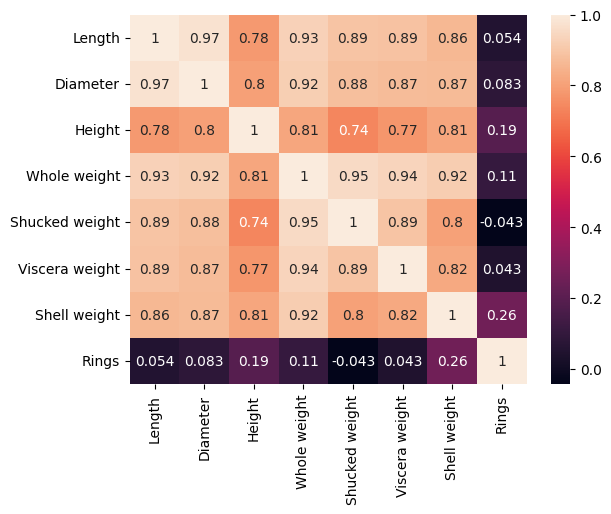

In [ ]:
# 10 이상의 타겟 값과의 상관 관계
abalone10 = abalone[abalone['Rings']>=10]
corr10 = abalone10.corr()
sns.heatmap(corr10, annot=True);

**4) 범주형 변수와 타겟 데이터 간의 상관 관계**<br>
- 3 개의 범주(Female, Male, Infant) 간의 불균형 및 큰 폭의 차이를 발견하지 못함.
- 대체적으로 균형을 이루고 있음.
<br>

In [ ]:
abalone.groupby('Sex')[list(numerical_features)].mean().sort_values('Rings')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561297,0.439204,0.151143,0.990661,0.432504,0.215367,0.281819,10.705959
F,0.579188,0.454809,0.157266,1.046879,0.446275,0.230776,0.302139,11.131700


# **💡Part 1. EDA 결과 Summary**<br>
- 전복의 **무게와 사이즈는 비례**하는 것을 알 수 있음.
- **성별에 따른** 무게 및 사이즈에 대한 특별한 **변화는 없음**.
- **Infant(어린) 전복** 그룹은 상대적으로 무게, 사이즈, 수명의 평균값이 다른 두 그룹보다 **작은 수치를 기록**하고 있음.
- **특정 수명에 도달**하면, 전복의 무게 및 사이즈의 **변화가 더이상 일어나지 않음**
<br>
---

# **Part 2. Business Insight** <br>
### **2-1. 전복 수명 예측 필요성**<br>
> - 전복은 국내에서 생산되는 **수산식품 中 수출량이 5위**에 달하며, 전복 **수출 상위 10개국 中 한국은 3위**를 기록하고 있다.
- 전복은 식품으로써의 가치만 있는 것이 아니라, 껍데기을 통해 **진주와 자개를 생산**해낼 수 있다.
- 근래에는 껍데기를 활용한 **재활용 기술을 개발**하고 있다.

<br>

### **2-2. 전복 수명 예측법**<br>
> 💡 전복의 수명은 껍데기의 뿔에 있는 ring의 개수에 따라 결정된다.

<br>

### **2-3. 인사이트**<br>
> 💡 **수출 전략**<br>
- 2022년 한국해양수산개발원의 전복 관측 보고서에 따르면, **일본 도매시장에서 일본산보다 한국산 활전복 가격 상승**했다.
- 이를 토대로 **한국산 전복에 대한 적절한 수요가 있으므로** 가격이 상승했을 것이라는 추측을 해볼 수 있다.
-  전복의 품질은 사이즈에 따라 결정된다. 크기가 클수록 높은 품질로 판단되어 가격이 매겨진다. 즉, 긴 수명을 가진 전복일수록  
<br>

>💡 **친환경 재활용 자원**<br>
-
<br>

<br>
[참고자료 1] "버려지던 조개 껍데기 새로운 소득원 된다", 해양수산부 보도자료(2023.01.12)<br>
[참고자료 2] "수산관측 2022년 1월호 전복", 한국해양수산개발원*(통권 제939호)<br>
[참고자료 3] "세계 전복 교역 동향", 한국해양수산개발원(2018)<br>
[참고자료 4] "굴 제치고 무려 韓 해산물 수출...", 중앙일보(2023.01.10)<br>
*한국해양수산개발원은 해양수산부 산하 연구 기관이다.
<br>

---

# **Part 3. Baseline** <br>
### **3-1. 코드 성능 확인**
> ```
Epoch 10, LR 0.001 <br>
Train Dataset - Loss = 5.863, Accuracy= 0.824 <br>
Test Dataset - Accuracy = 0.827
```

 <br>

### **3-2. 최고 성능을 내는 조합식**<br>

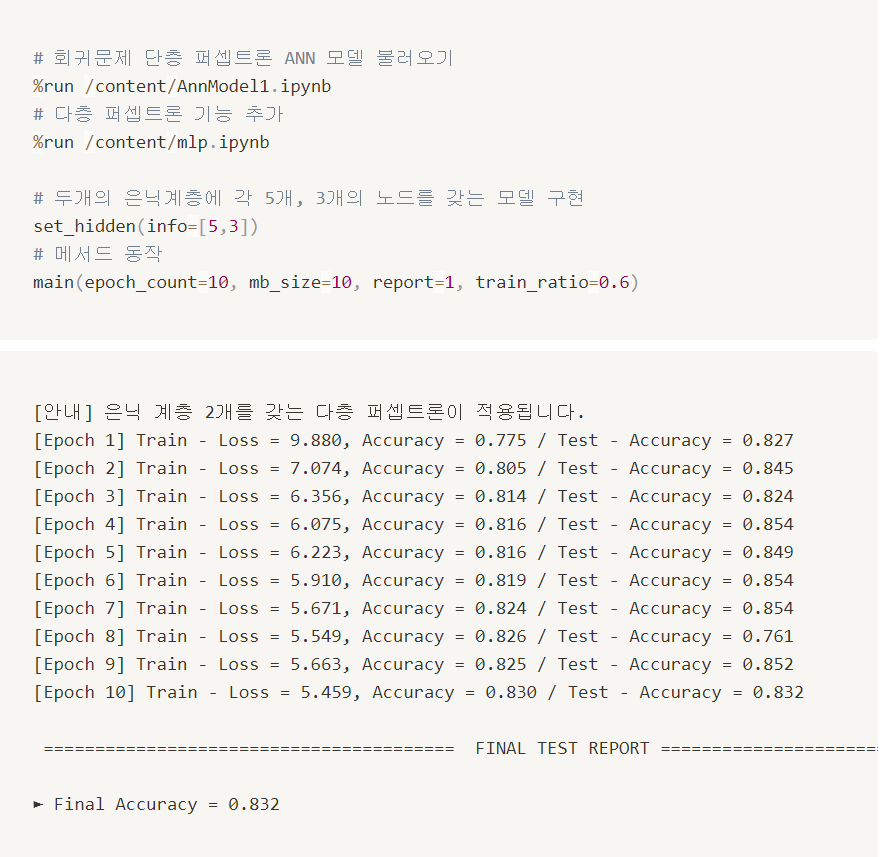


---

# **Part 4. ML 기법 및 데이터 양 적합성** <br>
### **4-1. ML 기법**<br>
> _다수의 독립변수를 제어할 수 있는 ML 기법_<br>

-
<br>

### **4-2. 데이터 양 적합성**<br>
- 데이터 양에 대한 명확하고 신뢰적인 기준은 없다.
- 상황, 목적 등에 따라서 필요한 데이터 양이 다르다.
- 또한 문제의 복잡도 및 학습 알고리즘의 복잡도에 따라서도 달라진다.
- 대체적으로 **_변수의 수에 100을 곱한 것보다 많은 양의 데이터_**가 필요하다.
- 머신러닝 및 딥러닝 분야에서는 데이터 개수가 많으면 많을수록 좋다.
- 데이터가 부족할 때에는 **_전이학습 (Transfer Learning)_**을 통해 보충할 수 있다.<br>
  - 데이터가 부족한 분야의 모델 구축을 위해 데이터가 풍부한 분야에서 훈련된 모델을 재사용하는 기법

<br>
[참고자료 1] 데이터 양에 대한 기준 : https://yozm.wishket.com/magazine/detail/1070/ <br>
[참고자료 2] 전이학습 : https://bibimnews.com/entry/%ED%95%99%EC%8A%B5%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%80%EC%A1%B1%ED%98%84%EC%83%81-%ED%95%B4%EA%B2%B0%EB%B2%95-%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5Transfer-Learning
<br>

---


# **Part 5. 모델 향상을 위한 Actions** <br>
💡 **AI 모델 성능 고도화 (MLOps)**
- 데이터 엔지니어링
- 모델 엔지니어링
  + 최적화: 성능 향상
  + 경량화: 모델 추론의 실시간성
- 모델 배포
<br>

### **5-1. 단기적인 Actions** <br>
> 📌 **코드 리펙터링** <br>
- 활용할 라이브러리 결정
- 코드 간결화: 리스트컴프리헨션 및 파이썬 메서드 활용
<br>

> 📌 **데이터 엔지니어링** <br>
- 충분한 양의 데이터 확보 - 전이 학습법 활용?
- 타겟 데이터 불균형 확인 - 분포 확인
- 정보 누수 확인 - 상관관계 확인 결과, 누수 없음
<br>

>📌 **모델 엔지니어링** <br>
- Baseline
  + 에폭, 미니배치, 은닉계층 깊이와 노드 수
  + 편향 경사하강법 사용
- 고도화된 모델
  + 성능 **평가지표 기준** 세우기
  + **미니배치 경사하강법** (iteration마다 N개의 배치 사이즈 데이터를 사용한다)
  + 다변수의 기울기 계산할 때에, 경사하강법의 비용이 커지므로 비효율적이다. 따라서 **오차역전파법**을 사용한다.
  - 오차역전파법(backpropagation)은 경사하강법의 미분계산 대신 수열의 점화식을 사용한다.
<br>

> 📌 **UIUX 개선 - 모델 배포** <br>
- Web APP 구현: 데이터 입력 및 결과 출력 페이지
<br>

### **5-2. 장기적인 Actions** <br>
> - 모델 버전별로 수집된 데이터 관리
- 배포된 모델 관리 및 모니터링 자동화
<br>

<br>
[참고자료] "AI 서비스 상용화에 따른 운영 및 고도화 전략", 티멕스소프트 AI연구본부 정대범 본부장 칼럼(2021.11.11), https://dataonair.or.kr/db-tech-reference/d-lounge/expert-column/?mod=document&uid=239768
<br>

---

# **Part 6. 차후 해야 하는 Actions**
### 📌 _도메인 조사 결과 정리_
### 📌 _Baseline 코드 탐색 및 이해_
### 📌 _성능 고도화 작업_